In [1]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

## A gradient descent and cost function history plotting function 

In [2]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
# g = variables(NDArray or list of NDArray) – Input variables to compute gradients for.
# alpha, 学习速率，自定
# w = [theta0, theta1]，待求的权值，取the last one
# max_its，最大迭代次数，自定
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
    #h(x) = theta0 + theta1*x

In [3]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories, labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history, label = label )
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show() 

# Chapter 5 Exercises

Complete exercises 2, 6, and 7 from Chapter 5 - make sure to download the most recent version of the text.  Below we load in each dataset.

## Exercise 2

y= 6.80691390355 + 0.651300089765 *x
a 10kg animal requires [  1.20052688e+15] calories


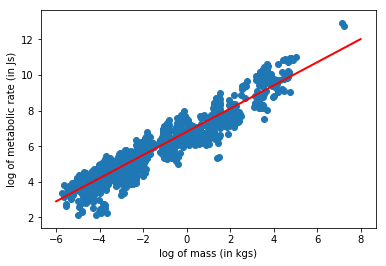

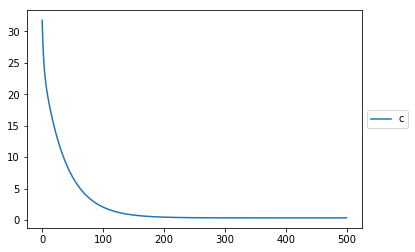

In [4]:
#from sklearn.linear_model import LinearRegression
#import matplotlib.pyplot as plt

# load in dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:]
x = np.log(x)
y = np.log(y)


# compute linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# an implementation of the least squares cost function for linear regression
def least_squares(w):
    #compute the least squares cost
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(y.size)

w = np.random.rand(2,1)
#np.asarray([1.5,1.5])

# solve linear system of equations for regression fit
# weights returned by solving linear system


weight, cost = gradient_descent(g = least_squares,alpha = 0.01,max_its = 500,w = w)
w = weight[len(weight)-1]
print('y=',w[0][0],'+',w[1][0],'*x')

ten_kg = w[0] + w[1]*np.log(10)
print ('a 10kg animal requires ' + str(np.exp(ten_kg* 4.18)) + ' calories')

# plot data with linear fit
s = np.linspace(-6,8,300)
t = w[0] + w[1]*s
plt.plot(s,t,linewidth = 2,color = 'r')
plt.scatter(x,y,linewidth = 1)
plt.xlabel('log of mass (in kgs)')
plt.ylabel('log of metabolic rate (in Js)')
plt.show()


#plot_cost_histories(cost)
plot_cost_histories([cost],'cost')


## Exercise 6

least_abs_squares:y= -0.862074488262 + 1.09742149327 *x
least_squares:y= 0.591738822199 + 2.75760612415 *x


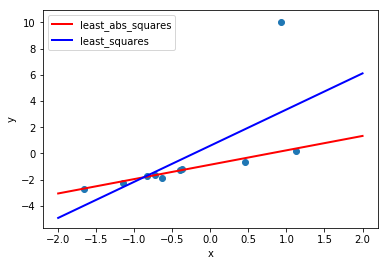

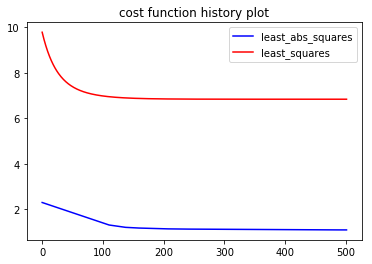

In [39]:
# load in dataset
csvname = datapath + 'regression_outliers.csv'
data = np.loadtxt(csvname,delimiter = ',')
# scatter plot the input data
#fig, ax = plt.subplots(1, 1, figsize=(4,4))
#ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
#plt.show()
# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T


def least_squares(w):
    #compute the least squares cost
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(y.size)

def least_abs_squares(w):
    cost = np.sum(abs(model(x,w) - y))
    return cost/float(y.size)
# try out least squares function
w = np.random.rand(2,1)
weight, cost = gradient_descent(g = least_abs_squares,alpha = 0.01,max_its = 500,w = w)
weight2, cost2 = gradient_descent(g = least_squares,alpha = 0.01,max_its = 500,w = w)
w = weight[len(weight)-1]
w2 = weight2[len(weight2)-1]
print('least_abs_squares:y=',w[0][0],'+',w[1][0],'*x')
print('least_squares:y=',w2[0][0],'+',w2[1][0],'*x')

# plot data with linear fit
s = np.linspace(-2,2,100)
t = w[0] + w[1]*s
plt.plot(s,t,linewidth = 2,color = 'r')
t2 = w2[0] + w2[1]*s
plt.plot(s,t2,linewidth = 2,color = 'b')
plt.legend(['least_abs_squares','least_squares'])
plt.scatter(x,y,linewidth = 1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

'''
#plot_cost_histories(cost)
#plot_cost_histories([cost],'cost')
times = np.linspace(0,2000,501)
print(len(cost))
print(len(times))
plt.plot(times,cost,linewidth = 1)
plt.xlabel('y')
plt.ylabel('cost')
plt.show()
'''

plt.title('cost function history plot')
plt.plot(np.linspace(0,501,501),cost,'b')
plt.plot(np.linspace(0,501,501),cost2,'r')
plt.legend(['least_abs_squares','least_squares'])
plt.show()

## Exercise 7

0.162566194354 0.518802562889 0.20779372912


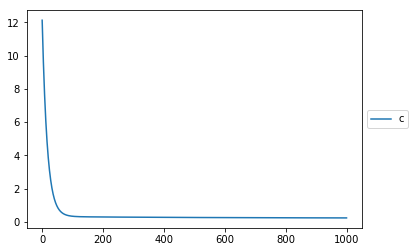

In [40]:
# load in dataset
csvname = datapath + 'linear_2output_regression.csv'
data = np.loadtxt(csvname,delimiter=',')

# get input and output of dataset
x = data[:2,:]
y = data[2:,:]

# linear model
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# least squares cost
def least_squares(w):
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

# try out least squares function
weight, cost = gradient_descent(g = least_squares,alpha = 0.01,max_its = 1000,w = np.array([2.0, 2.0, 2.0]))
w = weight[-1]
print(w[0],w[1],w[2])


#plot_cost_histories(cost)
plot_cost_histories([cost],'cost')


# Chapter 6

Complete exercises 7, 8, 9, and 14 from Chapter 6 - make sure to download the most recent version of the text.  Below we load in each dataset.

## Exercise 7

-6.61389511454 6.45256482728


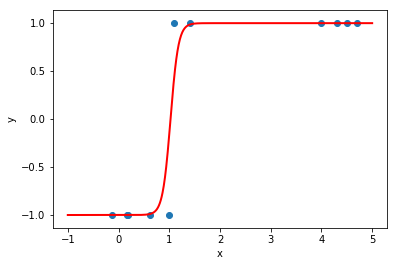

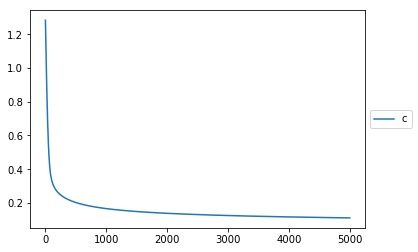

In [41]:
# load in dataset
csvname = datapath + '2d_classification_data_v1.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:]

# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

weight, cost = gradient_descent(softmax,0.1,5000,np.array([2.0, 2.0]))
w = weight[-1]
print(w[0],w[1])

# plot data with linear fit
s = np.linspace(-1,5,1000)
t = np.tanh(w[0]+w[1]*s)
plt.plot(s,t,linewidth = 2,color = 'r')
plt.scatter(x,y,linewidth = 1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#plot_cost_histories(cost)
plot_cost_histories([cost],'cost')

## Exercise 8

[-0.62488909] [ 2.1380332] [-2.02152988]
misclassifications num 5


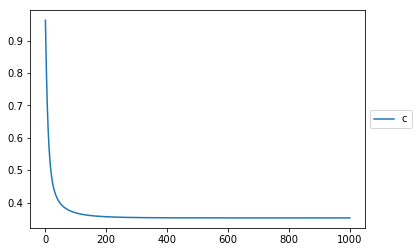

In [42]:
# load in dataset
csvname = datapath + '3d_classification_data_v0.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:]

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def improved_softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    #return cost
    sum = 0
    for item in w[1:]:
        sum += item**2
    return cost/float(np.size(y)) + 0.001*sum
def accuracy(res,y):
    acc = np.where(res.T[0]==y[0])[0].shape[0] / y[0].shape[0]
    return acc
def miss_num(y, y_predicted):
    num = 0
    temp = 0
    for i in range(0,len(y[0])):
        if y_predicted[0][i] > 0:
            temp = 1
        else:
            temp = -1
        if temp != y[0][i]:
            num += 1
    return num 

w = np.random.rand(3,1)
weight, cost = gradient_descent(improved_softmax,0.2,1000,w)
w = weight[-1]
print(w[0],w[1],w[2])

y_predicted = model(x,w)
print('misclassifications num',miss_num(y, y_predicted))

#plot_cost_histories(cost)
plot_cost_histories([cost],'cost')

## Exercise 9

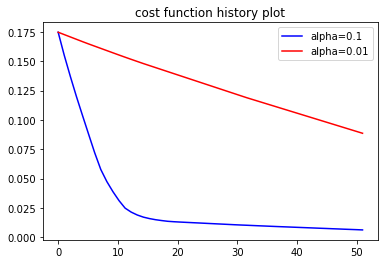

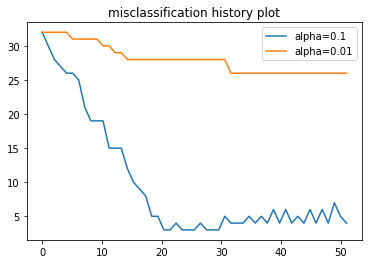

alpha=0.1, accurancy: 0.96
alpha=0.01, accurancy: 0.74


In [43]:
from autograd import numpy as np
from matplotlib import pyplot as plt
from autograd import grad 

datapath = 'datasets/'
csvname = datapath + '3d_classification_data_v0.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
x = np.concatenate((np.ones((1,100),dtype=float),x))

def model_new(x,w):
    return -y.T*np.dot(x.T,w)
def perception(w):
    tmp = np.maximum(0,(model_new(x,w)))
    return np.mean(tmp)        
def new_gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)
    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    mis_number = [count(w)]
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        mis_k = count(w)
        mis_number.append(mis_k)
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history,mis_number
def count(w):
    res = np.sign(np.dot(x.T,w))
    return np.where(res.T[0]!=y[0])[0].shape[0]
def acc(res,y):
    acc = np.where(res.T[0]==y[0])[0].shape[0] / y[0].shape[0]
    return acc 

   
tempw = np.random.rand(3,1)   
max_its = 50      
whis1, chis1, n1 = new_gradient_descent(perception, 0.1, max_its, tempw)
whis2, chis2, n2 = new_gradient_descent(perception, 0.01, max_its, tempw)


plt.title('cost function history plot')
plt.plot(np.linspace(0,max_its+1,max_its+1),chis1,'b')
plt.plot(np.linspace(0,max_its+1,max_its+1),chis2,'r')
plt.legend(['alpha=0.1','alpha=0.01'])
plt.show()


plt.title('misclassification history plot')
plt.plot(np.linspace(0,max_its+1,max_its+1),n1)
plt.plot(np.linspace(0,max_its+1,max_its+1),n2)
plt.legend(['alpha=0.1','alpha=0.01'])
plt.show()

print('alpha=0.1, accurancy:',acc(np.sign(np.dot(x.T,whis1[-1])),y))
print('alpha=0.01, accurancy:',acc(np.sign(np.dot(x.T,whis2[-1])),y))


## Exercise 14

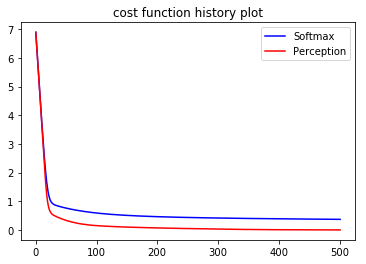

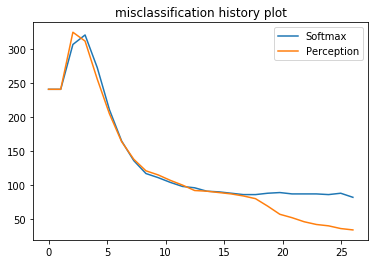

Softmax accuracy 0.882689556509299
Perception accuracy 0.9527896995708155


In [44]:
# load in dataset
csvname = datapath + 'breast_cancer_data.csv'
data1 = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data1[:-1,:]
y = data1[-1:,:] 
x = np.concatenate((np.ones((1,699),dtype=float),x))

def model_new(x,w):
    return -y.T*np.dot(x.T,w)
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(model_new(x,w))))
    return cost/float(np.size(y))
def perception(w):
    tmp = np.maximum(0,(model_new(x,w)))
    return np.mean(tmp)        
def new_gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    num = [count(w)] #initialization
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        if(k%20 == 0):
            num.append(count(w))
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history,num
def count(w):
    ans = np.sign(np.dot(x.T,w))
    return np.where(ans.T[0]!=y[0])[0].shape[0]
def acc(ans,y):
    acc = np.where(ans.T[0]==y[0])[0].shape[0] / y[0].shape[0]
    return acc

w = np.random.rand(9,1)   
max_its = 500
Whis1, Chis1,temp1 = new_gradient_descent(softmax,0.01,max_its,w) 
Whis2, Chis2,temp2 = new_gradient_descent(perception,0.01,max_its,w)
Acc1 = acc(np.sign(np.dot(x.T,Whis1[-1])),y)
Acc2 = acc(np.sign(np.dot(x.T,Whis2[-1])),y)
#print(temp1)
#print(temp2)

plt.title('cost function history plot')
plt.plot(np.linspace(0,max_its+1,max_its+1),Chis1,'b')
plt.plot(np.linspace(0,max_its+1,max_its+1),Chis2,'r')
plt.legend(['Softmax','Perception'])
plt.show()

plt.title('misclassification history plot')
plt.plot(np.linspace(0,26,26),temp1)
plt.plot(np.linspace(0,26,26),temp2)
plt.legend(['Softmax','Perception'])
plt.show()

print('Softmax accuracy',Acc1)
print('Perception accuracy',Acc2)
